In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
import pandas as pd
import math as mt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression


Populating the interactive namespace from numpy and matplotlib


In [177]:

dfsc=pd.read_excel('sc.xlsx',sheet_name='sc')
df=pd.read_excel('sc.xlsx',sheet_name='mauOD')

In [178]:
#first calculate standard curve

In [199]:
x = dfsc[["mau320"]]
y = dfsc[["mg/L"]]
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
# p=sns.regplot(x, y)
# a=p.get_lines()[0].get_xdata()
# b=p.get_lines()[0].get_ydata()
regr = LinearRegression()
# X = x.reshape(11,1)
# Y = y.reshape(11,1)
regr.fit(x, y)
coef=float(regr.coef_[0])
inter=float(regr.intercept_)

print('Standard curve, x=mau@320nm, y=titer\n','m=' ,coef,'\nb=',inter, '\nR2=',stats.pearsonr(dfsc['mg/L'],dfsc['mau320'])[0] ** 2)

Standard curve, x=mau@320nm, y=titer
 m= 0.1227973254309782 
b= -3.7532082269906653 
R2= 0.9995043572248375


<ipython-input-208-0e1fe069e2bb>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kind" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('HPLCstandardCurve.pdf',kind='pdf')


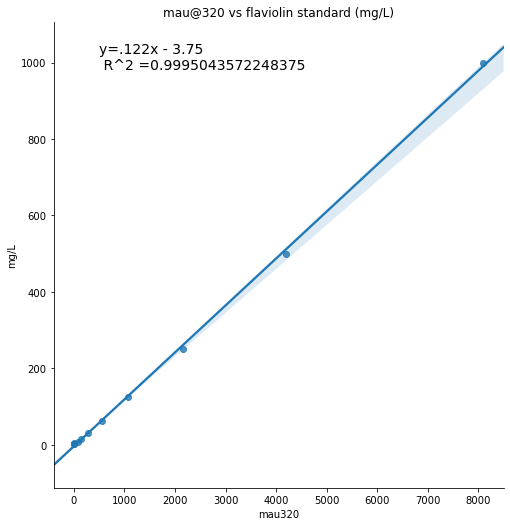

In [208]:
g = sns.lmplot(x="mau320", y="mg/L", data=dfsc,
               truncate=False,ci=95,
                  #xlim=(0, 60), ylim=(0, 12),
                   height=7)
props = dict(boxstyle='round', alpha=0,color=sns.color_palette()[0])
textstr = 'y=.122x - 3.75 \n R^2 ='+str(stats.pearsonr(dfsc['mau320'],dfsc['mg/L'])[0] ** 2)
g.ax.text(0.1, 0.9, textstr, transform=g.ax.transAxes, fontsize=14, bbox=props)
plt.title('mau@320 vs flaviolin standard (mg/L)')
plt.savefig('HPLCstandardCurve.pdf',kind='pdf')

In [201]:
#convert mau from HPLC measurements to titer (mg/L)

In [202]:
def curve(x):
    if x>0:
        return x*coef+inter
    else:
        return 0
df['titer']=df['mau320'].apply(curve)

In [203]:
x=df.OD340
y=df['titer']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
# p=sns.regplot(x, y)
# a=p.get_lines()[0].get_xdata()
# b=p.get_lines()[0].get_ydata()
regr = LinearRegression()
X = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
regr.fit(X, y)
coef2=float(regr.coef_[0])
inter2=float(regr.intercept_)

print('correlation between OD340 and mau320 (sample vs sample)\n''m=' ,coef2,'\nb=',inter2, '\nR2=',stats.pearsonr(df['OD340'],df['titer'])[0] ** 2)

correlation between OD340 and mau320 (sample vs sample)
m= 112.38737516669566 
b= -13.642318302694438 
R2= 0.7573787545130652


Text(0.5, 1.0, 'OD340 vs titer (mg/L)')

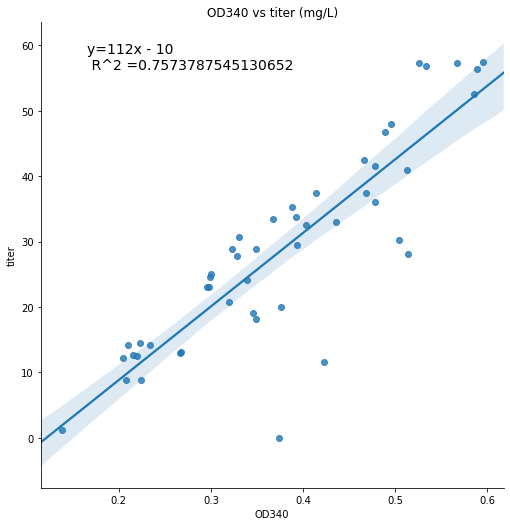

In [204]:
g = sns.lmplot(x="OD340", y="titer", data=df,
               truncate=False,ci=95,
                  #xlim=(0, 60), ylim=(0, 12),
                   height=7)
props = dict(boxstyle='round', alpha=0,color=sns.color_palette()[0])
textstr = 'y=112x - 10 \n R^2 ='+str(stats.pearsonr(df['OD340'],df['titer'])[0] ** 2)
g.ax.text(0.1, 0.9, textstr, transform=g.ax.transAxes, fontsize=14, bbox=props)
plt.title('OD340 vs titer (mg/L)')
plt.savefig('OD340 vs titer_OD34'

Text(0.5, 0, 'Assay')

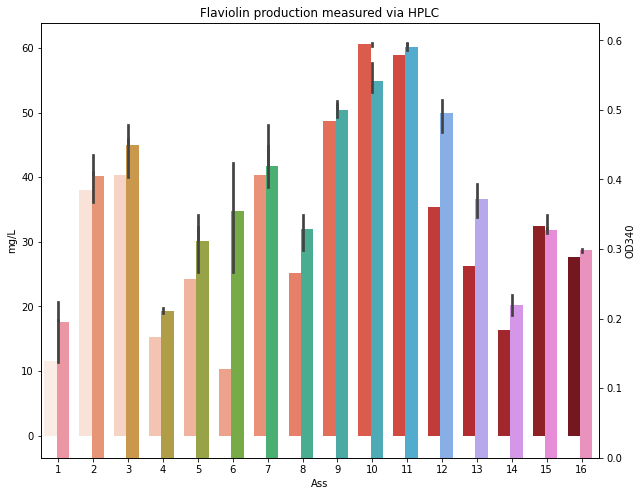

In [86]:
from matplotlib.ticker import PercentFormatter
plt.figure()
g=sns.barplot(data=df2, x='Ass',y='320_mg/L',
              palette = 'Reds',ci=95)
width_scale=.45
for bar in g.containers[0]:
    bar.set_width(bar.get_width()*width_scale)
#g.yaxis.set_major_formatter(PercentFormatter(1))
g.set_ylabel('mg/L')
ax2 = g.twinx()
sns.barplot(data=df2,x="Ass", y="OD340", ax=ax2)

for bar in ax2.containers[0]:
    x=bar.get_x()
    w=bar.get_width()
    bar.set_x(x+w*1-width_scale)
    bar.set_width(w*width_scale)

plt.title('Flaviolin production measured via HPLC')

plt.xlabel('Assay') 
#plt.legend(title='Arabinose (% w/v)', loc='upper left')